# Medición de Peces

## Escalar datos de peces para agruparlos

Se proporciona una serie samples de medidas de peces. Cada fila representa:
- un pez individual.
Las medidas como:
- el peso en gramos,
- la longitud en centímetros y
- el porcentaje de altura a longitud
tienen escalas muy diferentes.

Para agrupar estos datos de manera efectiva, primero debemos estandarizar estas características. Por lo que, crearémos una canalización para estandarizar y agrupar los datos.

In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

In [2]:
# DATA
ruta_archivo = '/home/jovyan/notebooks/data/fish.csv'
with open(ruta_archivo, 'r') as f:
    num_cols = len(f.readline().split(','))

samples = np.loadtxt(ruta_archivo, delimiter=',', usecols=range(1, num_cols))

species = pd.read_csv(ruta_archivo, usecols = [0],  header = None)
species = species[0].tolist()

In [56]:
# Crear un escalador: scaler
scaler = StandardScaler()

# Crear una instancia KMeans: kmeans
kmeans = KMeans(n_clusters = 4, n_init = 10, random_state = 50)

# Crear pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

## Agrupamiento de datos de pescado.

- Ahora utilizaremos la estandarización y la agrupación para agrupar los peces según sus medidas y, a continuación, creará una tabulación cruzada para comparar las etiquetas de los grupos con las especies de peces.

In [57]:
# Ajustar la tubería (pipeline) a las muestras.
pipeline.fit(samples)

# Predecir las etiquetas del cluster: labels
labels = pipeline.predict(samples)

# Crear un DataFrame con labels y species como columnas
df = pd.DataFrame({'labels': labels,
                  'species': species})

# Crear crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Imprimir ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0     0      0     13
3            0    17      0      0


### Varianza de las características PCA

El conjunto de datos de los peces tiene 6 dimensiones. Pero, ¿cuál es su dimensión intrínseca? Haremos gráfico de las varianzas de las características PCA para averiguarlo. 

Como antes, las muestras son una matriz 2D, donde cada fila representa un pez. Primero tendremos que estandarizar las características.

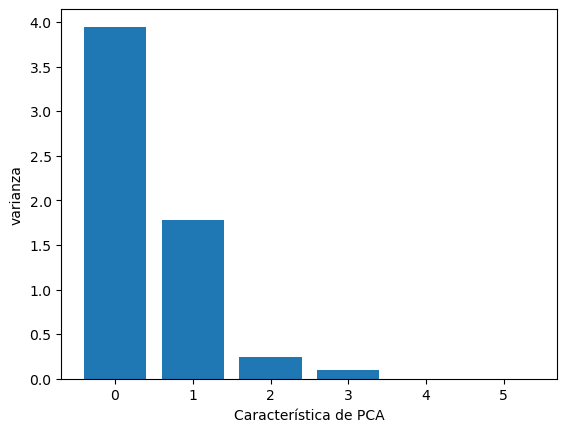

In [3]:
# Crea el escalador: scaler
scaler = StandardScaler()

# Crea una instancia de PCA: pca
pca = PCA()

# Crea la tubería: pipeline
pipeline = make_pipeline(scaler, pca)

# Ajusta la tubería a 'samples'
pipeline.fit(samples)

# Grafica las varianzas explicadas
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('Característica de PCA')
plt.ylabel('varianza')
plt.xticks(features)
plt.show()

Podría tener varianza significativa en dos características.

### Reducción de la dimensión de las medidas de los peces
Se vió que 2 era una elección razonable para la "dimensión intrínseca" de las medidas de los peces. Ahora utilizaremos PCA para reducir la dimensionalidad de las medidas de los peces, reteniendo sólo los 2 componentes más importantes.

Las medidas de los peces ya han sido escaladas y están disponibles como muestras_escaladas.

In [4]:
# Crea el escalador: scaler
scaler = StandardScaler()

# Crear un modelo PCA con 2 componentes: pca
pca = PCA(n_components = 2)

# Crea la tubería: pipeline
pipeline = make_pipeline(scaler, pca)

# Ajustar la instancia PCA a las muestras escaladas
pipeline.fit(samples)

# Transformar las muestras escaladas: pca_features
pca_features = pipeline.transform(samples)

# Imprimir la forma de pca_features
print(pca_features.shape)

(85, 2)
